<a href="https://colab.research.google.com/github/data-aleks/UFO_Sightings_python/blob/main/ufo_sightings_python_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PT2 Data Analysis of UFO sightings data set** to learn data analysis using python

**Project goal:**
I want to explore, clean, and analyze UFO sightings from the Kaggle dataset using Python. Learn python data analytics workflow and become comfrotable in using it for data analysis. This is **part 2** of the project where i dive head first in to data cleaning.

**Overview of ufo_dataset.csv:**
*   datetime - date and time information about the sighting
*   city - city where the sighting occured
*   state - state where the sighting occured
*   country - country where the sighting occured
*   shape - shape of the ufo
*   duration (seconds) - duration in seconds of the sighting
*   duration (hours/min) - duration in hours/minutes of teh sighting
*   comments - comment describing sighting
*   date posted - date this posting sighting made public
*   latitude - latitude information
*   longitude - longitude information

**Process steps:**
1.   Loading data, libraries and performing data explroation
  *   Exploring the dataset
  *   Changing datetime and date_posted to date type
  *   Confirm changes to column type
  *   Looking at first/last 5 records
2.   Visualising data
  *   Visualising UFO sightings over time
  *   Visualising most common UFO shapes
  *   Visualising sightings by location
  *   Visualising Correlation Between Space Launches and UFO Sightings
  *   Visualising Correlation Sci Fi Movie Releases ( scraped data ) and UFO Sightings  







## **Step 1.** Loading data, libraries and performing data explroation


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('./drive/MyDrive/datasets/df_clean.csv')

### **Step 1.1** Let's explore our dataset using info

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79561 entries, 0 to 79560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            79561 non-null  object 
 1   city                79561 non-null  object 
 2   state               79561 non-null  object 
 3   country             79561 non-null  object 
 4   shape               79561 non-null  object 
 5   duration_seconds    79561 non-null  float64
 6   duration_hours_min  79561 non-null  float64
 7   comments            79561 non-null  object 
 8   date_posted         79561 non-null  object 
 9   latitude            79561 non-null  float64
 10  longitude           79561 non-null  float64
dtypes: float64(4), object(7)
memory usage: 6.7+ MB


### **Step 1.2** Changing datetime and date_posted to date type

First things first, we need to change type of datetime and date_posted column to date type.

In [44]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date_posted'] = pd.to_datetime(df['date_posted'])

### **Step 1.3** Confirm changes to column type.

Let's confirm changes.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79561 entries, 0 to 79560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            79561 non-null  datetime64[ns]
 1   city                79561 non-null  object        
 2   state               79561 non-null  object        
 3   country             79561 non-null  object        
 4   shape               79561 non-null  object        
 5   duration_seconds    79561 non-null  float64       
 6   duration_hours_min  79561 non-null  float64       
 7   comments            79561 non-null  object        
 8   date_posted         79561 non-null  datetime64[ns]
 9   latitude            79561 non-null  float64       
 10  longitude           79561 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 6.7+ MB


### **Step 1.4** Look at first 5 and last 5 records.

In [46]:
df.head()

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,0.750,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,us,light,7200.0,2.000,"1949 Lackland AFB, TX. Lights racing across t...",2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester,England,gb,circle,20.0,0.006,"Green/Orange circular disc over Chester, England",2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,0.006,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,0.250,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [47]:
df.tail()

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude
79556,2013-09-09 21:15:00,nashville,tn,us,light,600.0,0.167,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
79557,2013-09-09 22:00:00,boise,id,us,circle,1200.0,0.333,"Boise, ID, spherical, 20 min, 10 red lights, s...",2013-09-30,43.613611,-116.202500
79558,2013-09-09 22:00:00,napa,ca,us,other,1200.0,0.333,"Napa UFO,",2013-09-30,38.297222,-122.284444
79559,2013-09-09 22:20:00,vienna,va,us,circle,5.0,0.001,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556
79560,2013-09-09 23:00:00,edmond,ok,us,cigar,1020.0,0.283,"2 witnesses 2 miles apart, Red & White Elonga...",2013-09-30,35.652778,-97.477778


# **Step 2.** Visualising data


In this step we will visualise various data available to us

## **Step 2.1** Visualising UFO sightings over time

In [48]:
# Create year column from our datetime column, and aggregate sighting per year
df['year'] = df['datetime'].dt.year
sightings_by_year = df['year'].value_counts().sort_index()

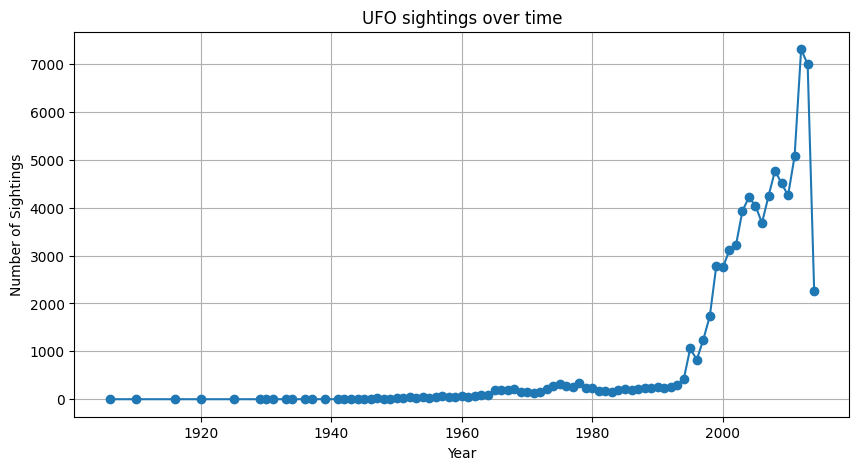

In [49]:
# Plotting the sightings
plt.figure(figsize=(10,5))
plt.plot(sightings_by_year.index, sightings_by_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.title("UFO sightings over time")
plt.grid()
plt.show()

## **Step 2.2** Visualising most common UFO shapes

In this step we will visualise the most common UFO shapes using bar chart.

In [50]:
# Let's see how many shapes we have in our dataset
shapes_in_data = len(pd.unique(df['shape']))
print(shapes_in_data)

28


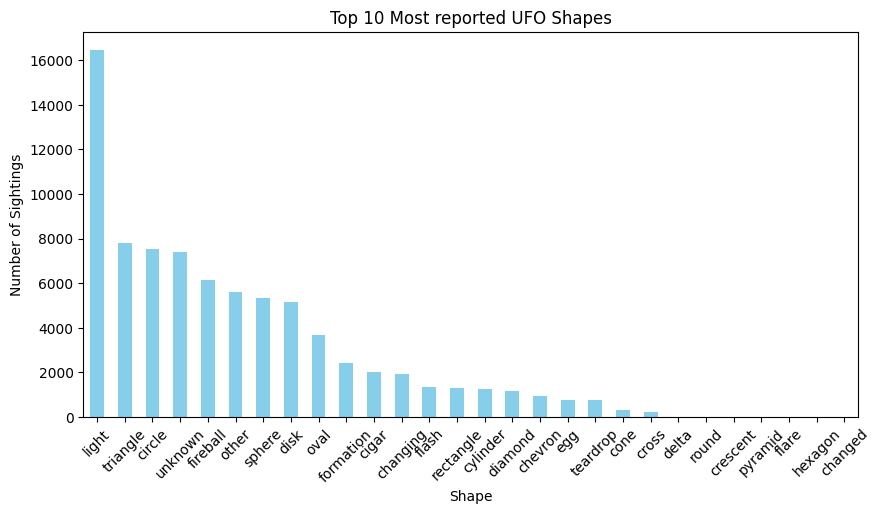

In [51]:
# Let's visualise our shape data as a bar chart
df['shape'].value_counts().head(shapes_in_data).plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Top 10 Most reported UFO Shapes")
plt.xlabel("Shape")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.show()

## **Step 2.3** Visualising sightings by location


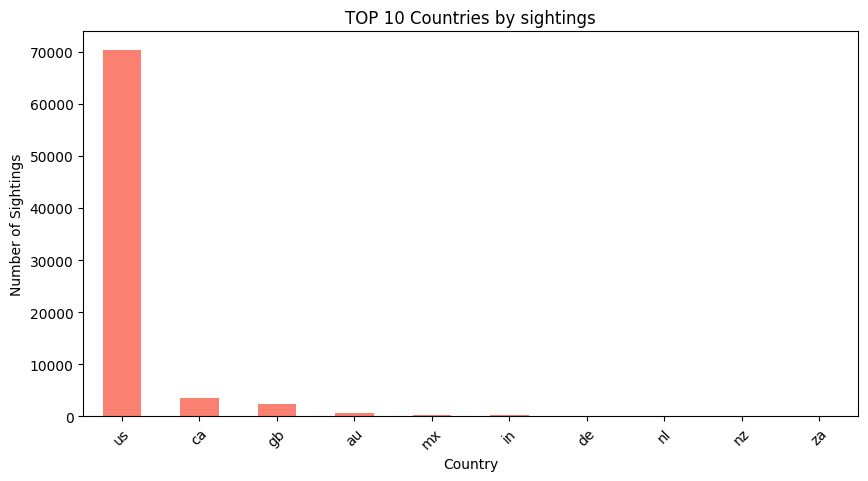

In [52]:
df['country'].value_counts().head(10).plot(kind="bar", figsize=(10,5), color="salmon")
plt.title("TOP 10 Countries by sightings")
plt.xlabel("Country")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.show()

## **Step 2.4** Visualising Correlation Between Space Launches ( public data from Our World In Data ) and UFO Sightings

Let's get some data, i've found a cool API which allows us to see number of space launches by year.

In [104]:
import requests

# Fetch the data.
df_space_launches = pd.read_csv("https://ourworldindata.org/grapher/yearly-number-of-objects-launched-into-outer-space.csv?v=1&csvType=filtered&useColumnShortNames=true&time=earliest..2024&country=USA~CHN~GBR~FRA~RUS~IND~JPN~European+Space+Agency~DEU", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/yearly-number-of-objects-launched-into-outer-space.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [123]:
df_space_launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Entity           441 non-null    object
 1   Code             401 non-null    object
 2   Year             441 non-null    int64 
 3   annual_launches  441 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 13.9+ KB


Let's create a combined dataframe of Sightings and Annual launches by Year

In [114]:
# Convert UFO sightings per year into a DataFrame
df_sightings_by_year = pd.DataFrame({'Year': sightings_by_year.index, 'Sightings': sightings_by_year.values})

# Aggregate total launches per year
df_space_launches_by_year = df_space_launches.groupby("Year")["annual_launches"].sum().reset_index()

# Merge datasets on Year
df_sightings_and_launches = df_sightings_by_year.merge(df_space_launches_by_year, on="Year", how="inner")

# Keep only relevant columns
df_sightings_and_launches = df_sightings_and_launches[['Year', 'Sightings', 'annual_launches']]

# Display the first few rows
df_sightings_and_launches.head()


,Year,Sightings,annual_launches
0,1957,68,2
1,1958,43,8
2,1959,48,14
3,1960,63,20
4,1961,48,38


Import scipy and calculate pearson correlation coefficient.

In [116]:


correlation, p_value = stats.pearsonr(df_sightings_and_launches['Sightings'], df_sightings_and_launches['annual_launches'])


Create a scatter plot with a trendline to see if there is a correlation between number of UFO sightings and space launches.

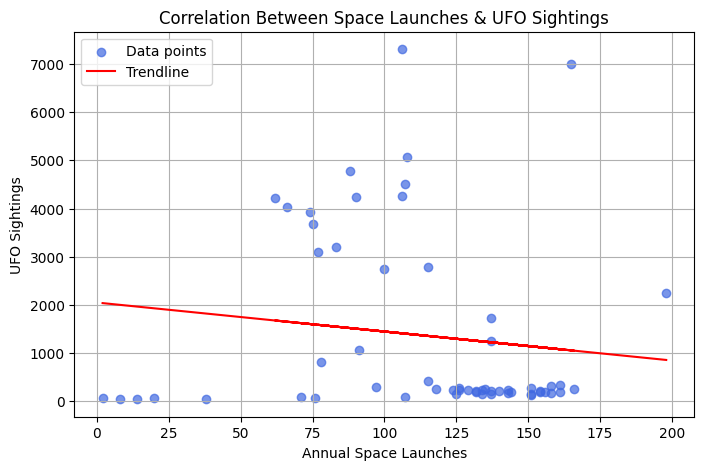

In [122]:
# Scatter plot of data points
plt.figure(figsize=(8, 5))
plt.scatter(df_sightings_and_launches['annual_launches'], df_sightings_and_launches['Sightings'], alpha=0.7, color='royalblue', label="Data points")

# Compute trendline (linear regression)
m, b = np.polyfit(df_sightings_and_launches['annual_launches'], df_sightings_and_launches['Sightings'], 1)
plt.plot(df_sightings_and_launches['annual_launches'], m * df_sightings_and_launches['annual_launches'] + b, color='red', label="Trendline")

# Labels & Formatting
plt.xlabel("Annual Space Launches")
plt.ylabel("UFO Sightings")
plt.title("Correlation Between Space Launches & UFO Sightings")
plt.legend()
plt.grid()

# Show plot
plt.show()


As we can see there is very low or no correlation between annual space launches and number of UFO sightings.

## **Step 2.5** Visualising Correlation Sci Fi Movie Releases ( scraped data ) and UFO Sightings

Let's load our scraped sci fi movie data.

In [164]:
df_movies = pd.read_csv('./drive/MyDrive/datasets/sci_fi_movies.csv')

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   500 non-null    object 
 1   year    498 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


Let's remove missing values.

In [176]:
# Drop recrods that have missing year
df_movies = df_movies.dropna(subset=["year"])
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   498 non-null    object 
 1   year    498 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.7+ KB


Lets group our movies by year

In [170]:
# Group movie released by year
movies_by_year = df_movies.groupby("year")["title"].count().reset_index()

movies_by_year.columns = ["Year", "Movies_Released"]

print(movies_by_year.head())


     Year  Movies_Released
0  1918.0                1
1  1950.0                2
2  1951.0                4
3  1953.0                1
4  1955.0                3


Merge our previously declared sightings_by_year with movies_by_year

In [171]:
# Merge sightings and movies together
df_sightings_and_movies = df_sightings_by_year.merge(movies_by_year, on="Year", how="inner")


In [172]:
df_sightings_and_movies.head()

,Year,Sightings,Movies_Released
0,1950,27,2
1,1951,20,4
2,1953,31,1
3,1955,31,3
4,1956,42,3


Calculate correlation between sightings and movies released.

In [173]:
# Correlation calculation
correlation, p_value = stats.pearsonr(df_sightings_and_movies['Sightings'], df_sightings_and_movies['Movies_Released'])


And finally create a scatter plot to visualise the correlation between ufo sightings and movies_released.

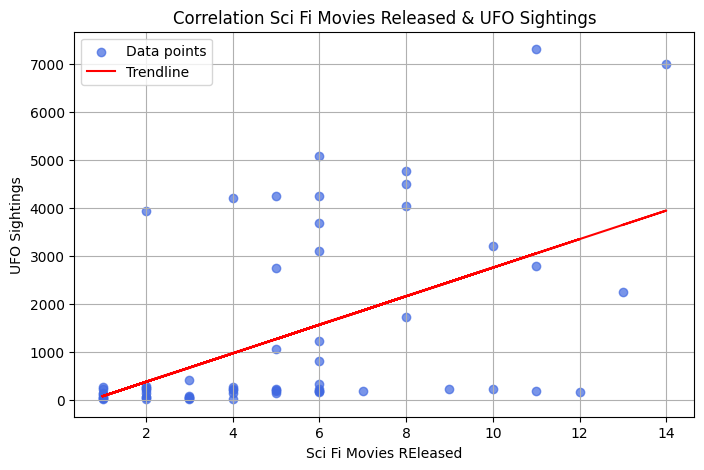

In [174]:
# Scatter plot of data points
plt.figure(figsize=(8, 5))
plt.scatter(df_sightings_and_movies['Movies_Released'], df_sightings_and_movies['Sightings'], alpha=0.7, color='royalblue', label="Data points")

# Compute trendline (linear regression)
m, b = np.polyfit(df_sightings_and_movies['Movies_Released'], df_sightings_and_movies['Sightings'], 1)
plt.plot(df_sightings_and_movies['Movies_Released'], m * df_sightings_and_movies['Movies_Released'] + b, color='red', label="Trendline")

# Labels & Formatting
plt.xlabel("Sci Fi Movies Released")
plt.ylabel("UFO Sightings")
plt.title("Correlation Sci Fi Movies Released & UFO Sightings")
plt.legend()
plt.grid()

# Show plot
plt.show()